In [1]:
from Algorithm import Gaussian_Process
from Algorithm import LA_Bayessian_Quadrature
from Algorithm import Mesh
from Algorithm import Kernels
import Target_Function as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from SALib.analyze import sobol as analyze_sobol
from SALib.sample import sobol as sample_sobol
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
opt_spy  = tf.Option('call', 0, 600, 0.1672, 0.15,  1, 100)   # SPDR S&P 500 ETF  (广义市场基准)
opt_aapl = tf.Option('call', 1, 200, 0.2613, 0.49,  1, 100)   # Apple
opt_tsla = tf.Option('call', 2, 350, 0.6398, 0.57,  1, 100)   # Tesla
opt_nvda = tf.Option('call', 3, 145, 0.3482, 0.24,  1, 100)   # NVIDIA
opt_amzn = tf.Option('call', 4, 210, 0.2902, 0.24,  1, 100)   # Amazon
opt_meta = tf.Option('call', 5, 700, 0.2924, 0.24,  1, 100)   # Meta
opt_msft = tf.Option('call', 6, 485, 0.1817, 0.15,  1, 100)   # Microsoft
opt_goog = tf.Option('call', 7, 165, 0.3226, 0.32,  1, 100)   # Google
opt_amd  = tf.Option('call', 8, 130, 0.4065, 0.32,  1, 100)   # AMD
opt_mstr = tf.Option('call', 9, 370, 0.5098, 0.49,  1, 100)   # MicroStrategy

In [3]:
def LABQ_alter(D):
    options = [opt_spy, opt_aapl, opt_tsla, opt_nvda, opt_amzn,
               opt_meta, opt_msft, opt_goog, opt_amd, opt_mstr]
    portfolio = tf.OptionPortfolio(
        0.04,50,900,
        options[:D]
    )
    D = len(portfolio.options)
    func = portfolio.target_function

    beta = np.concatenate([
    np.array([-0.5]),
    np.random.uniform(-2, 0, size=11 * D)
    ])

    problem = {
        'num_vars': D,
        'names': [f"x{i + 1}" for i in range(D)],
        'bounds': [[0, 1]] * D
    }
    N = 32
    param_values = sample_sobol.sample(problem, N, calc_second_order=False)
    result_values = np.array([func(x) for x in param_values])
    Si = analyze_sobol.analyze(problem, result_values, calc_second_order=False)
    point_set = Mesh.get_points_Sobol_D_adaptive(Si['S1'],100)


    GP = Gaussian_Process.GaussianProcess(Kernels.K_lin_mat2_10,beta,param_values,result_values,mesh = point_set)
    a, b, times, uncertainties = LA_Bayessian_Quadrature.LABQ_D_Sobol(
        func,
        GP,
        Mesh.get_points_Sobol,
        rate = 0.05,
        min_n = 30,
        max_n = 300,
        lambd = [30, 1],
        point_mesh = point_set,
        sobol = 3
    )
    return times,uncertainties

In [4]:
t = []
un = []

In [5]:
ti, unce = LABQ_alter(3)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_Sobol_3D.csv", index=False)

Dimensions: 3 , Sobol: 3
Step 1, Time: 34.84, Result: [6.06009428e-01 2.48391202e-05], Uncertainty Rate: 0.82%
Step 2, Time: 52.67, Result: [6.05764510e-01 2.18949709e-05], Uncertainty Rate: 0.77%
Step 3, Time: 50.94, Result: [6.06033285e-01 2.11394321e-05], Uncertainty Rate: 0.76%
Step 4, Time: 32.33, Result: [6.06899849e-01 2.05123468e-05], Uncertainty Rate: 0.75%
Step 5, Time: 34.21, Result: [6.07532468e-01 1.94000954e-05], Uncertainty Rate: 0.72%
Step 6, Time: 46.35, Result: [6.07574484e-01 1.89009384e-05], Uncertainty Rate: 0.72%
Step 7, Time: 55.67, Result: [6.07525570e-01 1.83734248e-05], Uncertainty Rate: 0.71%
Step 8, Time: 40.62, Result: [6.07746871e-01 1.80402255e-05], Uncertainty Rate: 0.70%
Step 9, Time: 70.25, Result: [6.07716785e-01 1.75086345e-05], Uncertainty Rate: 0.69%
Step 10, Time: 23.61, Result: [6.07692824e-01 1.67752734e-05], Uncertainty Rate: 0.67%
Step 11, Time: 35.01, Result: [6.07435723e-01 1.63724414e-05], Uncertainty Rate: 0.67%
Step 12, Time: 43.96, Resul

In [6]:
ti, unce = LABQ_alter(4)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_Sobol_4D.csv", index=False)

Dimensions: 4 , Sobol: 3
Step 1, Time: 63.47, Result: [6.37305688e-01 1.62320226e-04], Uncertainty Rate: 2.00%
Step 2, Time: 21.73, Result: [6.37962847e-01 1.56888984e-04], Uncertainty Rate: 1.96%
Step 3, Time: 124.24, Result: [6.38920329e-01 1.54238842e-04], Uncertainty Rate: 1.94%
Step 4, Time: 46.86, Result: [6.38823832e-01 1.51224194e-04], Uncertainty Rate: 1.92%
Step 5, Time: 57.48, Result: [6.39734156e-01 1.48314104e-04], Uncertainty Rate: 1.90%
Step 6, Time: 118.52, Result: [6.40920932e-01 1.45522458e-04], Uncertainty Rate: 1.88%
Step 7, Time: 49.29, Result: [6.41669886e-01 1.41283144e-04], Uncertainty Rate: 1.85%
Step 8, Time: 42.25, Result: [6.42422152e-01 1.38952004e-04], Uncertainty Rate: 1.83%
Step 9, Time: 44.34, Result: [6.42478027e-01 1.36743398e-04], Uncertainty Rate: 1.82%
Step 10, Time: 38.17, Result: [6.42925273e-01 1.33737779e-04], Uncertainty Rate: 1.80%
Step 11, Time: 36.11, Result: [6.43425335e-01 1.28989089e-04], Uncertainty Rate: 1.77%
Step 12, Time: 124.79, Re

In [7]:
ti, unce = LABQ_alter(5)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_Sobol_5D.csv", index=False)

Dimensions: 5 , Sobol: 3
Step 1, Time: 162.26, Result: [5.88872066e-01 3.18385435e-04], Uncertainty Rate: 3.03%
Step 2, Time: 100.48, Result: [5.89673096e-01 3.11165891e-04], Uncertainty Rate: 2.99%
Step 3, Time: 49.73, Result: [5.92236094e-01 3.08982578e-04], Uncertainty Rate: 2.97%
Step 4, Time: 52.28, Result: [5.92429323e-01 3.05361689e-04], Uncertainty Rate: 2.95%
Step 5, Time: 53.87, Result: [5.92945311e-01 3.01048583e-04], Uncertainty Rate: 2.93%
Step 6, Time: 73.20, Result: [5.93447599e-01 2.98492747e-04], Uncertainty Rate: 2.91%
Step 7, Time: 79.09, Result: [5.94020755e-01 2.93452874e-04], Uncertainty Rate: 2.88%
Step 8, Time: 72.20, Result: [5.94349913e-01 2.90350629e-04], Uncertainty Rate: 2.87%
Step 9, Time: 69.51, Result: [5.94473850e-01 2.86869777e-04], Uncertainty Rate: 2.85%
Step 10, Time: 52.12, Result: [5.95131705e-01 2.85080565e-04], Uncertainty Rate: 2.84%
Step 11, Time: 61.94, Result: [5.95512205e-01 2.82083334e-04], Uncertainty Rate: 2.82%
Step 12, Time: 80.35, Res

In [8]:
ti, unce = LABQ_alter(6)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_Sobol_6D.csv", index=False)

Dimensions: 6 , Sobol: 3
Step 1, Time: 224.98, Result: [4.13430217e-01 3.61040813e-04], Uncertainty Rate: 4.60%
Step 2, Time: 117.23, Result: [4.14107064e-01 3.55888662e-04], Uncertainty Rate: 4.56%
Step 3, Time: 144.67, Result: [4.14810527e-01 3.52197022e-04], Uncertainty Rate: 4.52%
Step 4, Time: 123.05, Result: [4.15185930e-01 3.48373485e-04], Uncertainty Rate: 4.50%
Step 5, Time: 106.56, Result: [4.15978859e-01 3.46123596e-04], Uncertainty Rate: 4.47%
Step 6, Time: 59.48, Result: [4.16502966e-01 3.42874868e-04], Uncertainty Rate: 4.45%
Step 7, Time: 85.47, Result: [4.17789251e-01 3.40183448e-04], Uncertainty Rate: 4.41%
Step 8, Time: 68.57, Result: [4.18458326e-01 3.36690523e-04], Uncertainty Rate: 4.38%
Step 9, Time: 100.70, Result: [4.18564928e-01 3.33186644e-04], Uncertainty Rate: 4.36%
Step 10, Time: 76.61, Result: [4.19211846e-01 3.30648728e-04], Uncertainty Rate: 4.34%
Step 11, Time: 67.90, Result: [4.20158803e-01 3.28076210e-04], Uncertainty Rate: 4.31%
Step 12, Time: 67.98,

In [9]:
ti, unce = LABQ_alter(7)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_Sobol_7D.csv", index=False)

Dimensions: 7 , Sobol: 3
Step 1, Time: 380.44, Result: [0.27261374 0.00033399], Uncertainty Rate: 6.70%
Step 2, Time: 109.87, Result: [0.27457002 0.00033004], Uncertainty Rate: 6.62%
Step 3, Time: 89.73, Result: [0.27540601 0.00032853], Uncertainty Rate: 6.58%
Step 4, Time: 124.65, Result: [0.27702118 0.00032319], Uncertainty Rate: 6.49%
Step 5, Time: 120.05, Result: [0.27817265 0.00032116], Uncertainty Rate: 6.44%
Step 6, Time: 187.29, Result: [0.27887268 0.00031865], Uncertainty Rate: 6.40%
Step 7, Time: 94.48, Result: [0.27909317 0.00031798], Uncertainty Rate: 6.39%
Step 8, Time: 84.25, Result: [0.28022063 0.0003164 ], Uncertainty Rate: 6.35%
Step 9, Time: 163.40, Result: [0.28154331 0.00031446], Uncertainty Rate: 6.30%
Step 10, Time: 92.66, Result: [0.2823703  0.00031294], Uncertainty Rate: 6.26%
Step 11, Time: 97.85, Result: [0.28342589 0.00031157], Uncertainty Rate: 6.23%
Step 12, Time: 108.58, Result: [0.28503153 0.00030922], Uncertainty Rate: 6.17%
Step 13, Time: 109.69, Result

In [10]:
ti, unce = LABQ_alter(8)
t.append(ti)
un.append(unce)
data = {
    "Step": list(range(1, len(ti) + 1)),
    "Time": ti,
    "Uncertainty": unce
}
df = pd.DataFrame(data)
df.to_csv("Results/LABQ_Sobol_8D.csv", index=False)

Dimensions: 8 , Sobol: 3
Step 1, Time: 670.48, Result: [0.17633954 0.00026009], Uncertainty Rate: 9.15%
Step 2, Time: 279.43, Result: [0.17745822 0.0002587 ], Uncertainty Rate: 9.06%
Step 3, Time: 140.26, Result: [0.17832615 0.00025784], Uncertainty Rate: 9.00%
Step 4, Time: 139.70, Result: [0.17958777 0.00025606], Uncertainty Rate: 8.91%
Step 5, Time: 135.03, Result: [0.18036294 0.00025512], Uncertainty Rate: 8.86%
Step 6, Time: 217.56, Result: [0.18094935 0.00025414], Uncertainty Rate: 8.81%
Step 7, Time: 230.69, Result: [0.18143946 0.00025355], Uncertainty Rate: 8.78%
Step 8, Time: 195.13, Result: [0.18271063 0.00025271], Uncertainty Rate: 8.70%
Step 9, Time: 158.98, Result: [0.1839876  0.00025163], Uncertainty Rate: 8.62%
Step 10, Time: 110.21, Result: [0.18491883 0.00025117], Uncertainty Rate: 8.57%
Step 11, Time: 168.74, Result: [0.18556511 0.00024961], Uncertainty Rate: 8.51%
Step 12, Time: 155.50, Result: [0.18679534 0.00024881], Uncertainty Rate: 8.44%
Step 13, Time: 144.02, R

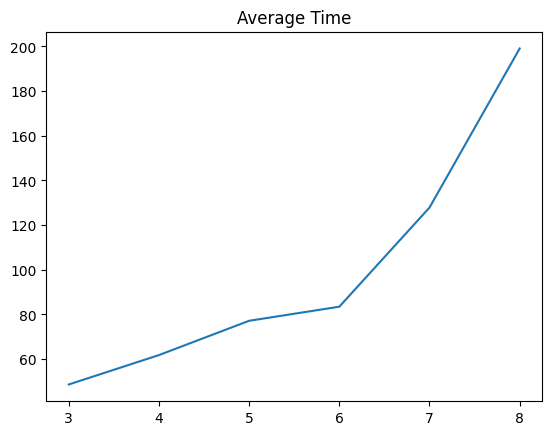

In [12]:
dimension = 8
avg_time = []
for i in range(dimension - 2):
        avg_time.append(np.mean(t[i]))
plt.plot(range(3, dimension + 1),avg_time)
plt.title("Average Time")
plt.show()


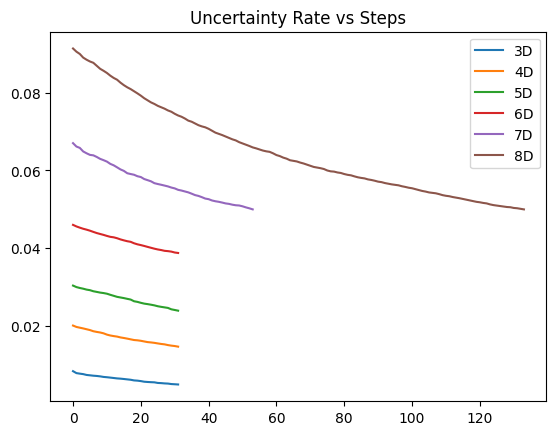

In [13]:
for i in range(dimension - 2):
    plt.plot(range(len(un[i])), un[i], label=f"{i+3}D")
plt.title("Uncertainty Rate vs Steps")
plt.legend()
plt.show()

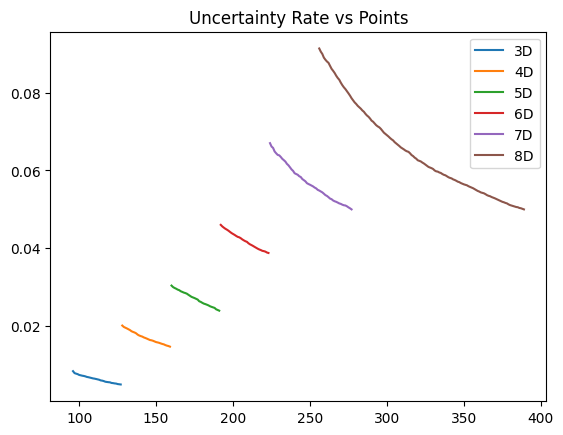

In [14]:
steps = []
for i in range(dimension - 2):
    steps.append([32 * (i+3) + p for p in range(len(un[i]))])
    plt.plot(steps[i], un[i], label=f"{i+3}D")
plt.title("Uncertainty Rate vs Points")
plt.legend()
plt.show()

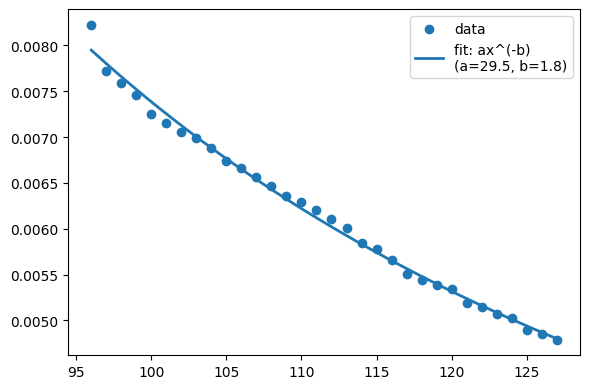

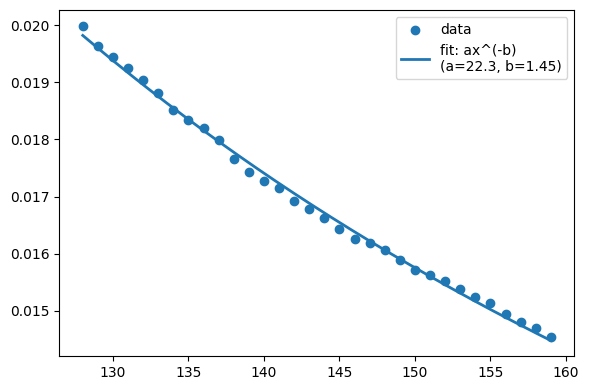

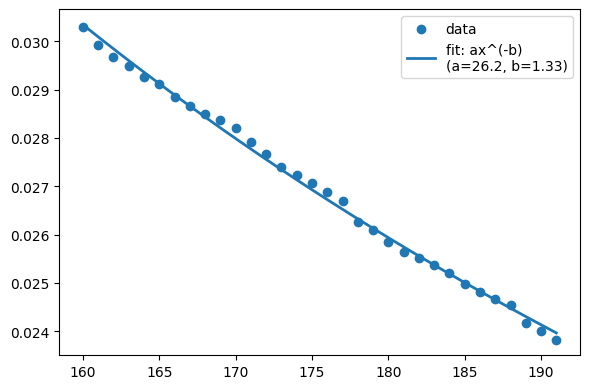

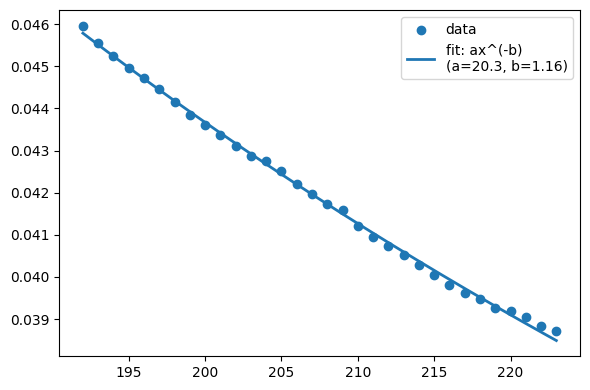

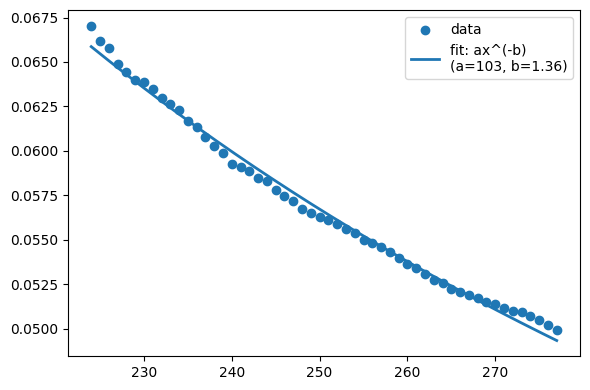

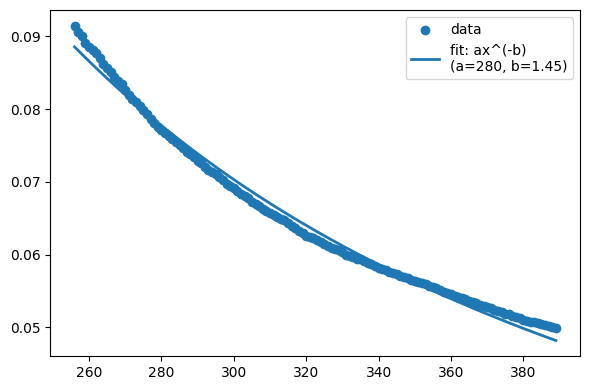

In [15]:
from scipy.optimize import curve_fit

def inv_with_offset(x, a, b):
    return a * x**(-b)
a = []
b = []
for i in range(dimension - 2):

    x = np.array(steps[i],dtype=float)
    y = np.array(un[i],dtype=float)

    p0 = [y[0] * x[0], y[-1]]
    popt, pcov = curve_fit(inv_with_offset, x, y, p0=p0, maxfev=5000)
    aa, bb = popt
    a.append(aa)
    b.append(bb)

    x_dense = np.linspace(x.min(), x.max(), 500)
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label="data", zorder=3)
    plt.plot(x_dense, inv_with_offset(x_dense, *popt),
             label=f"fit: ax^(-b)\n(a={aa:.3g}, b={bb:.3g})",
             linewidth=2)
    plt.legend()
    plt.tight_layout()
    plt.show()

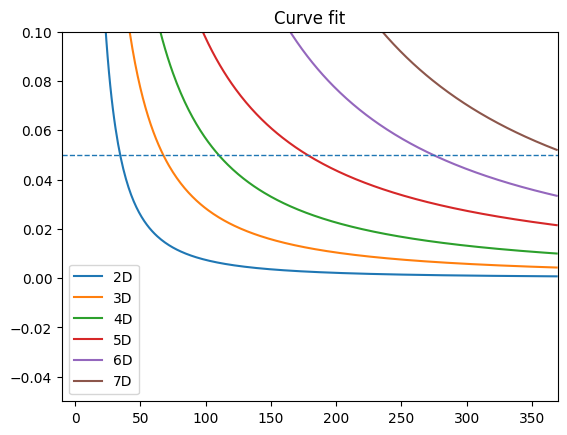

In [16]:
for i in range(dimension - 2):
    xxx = range(1,370)
    yyy = [a[i] * pp ** (-b[i]) for pp in xxx]
    plt.plot(xxx,yyy, label=f"{i+2}D")
plt.axhline(0.05, linestyle='--', linewidth=1)
plt.title("Curve fit")
plt.xlim(-10,370)
plt.ylim(-.05, .1)
plt.legend()
plt.show()
